# Orders - Multivariate Regression of review score

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other one constant**.

<AxesSubplot:>

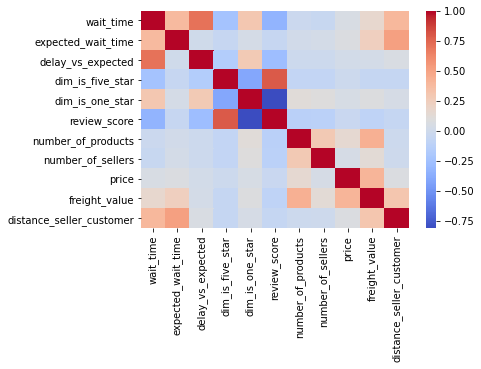

In [5]:
sns.heatmap(orders.corr(), cmap='coolwarm')

(0.0, 5.932273655395084)

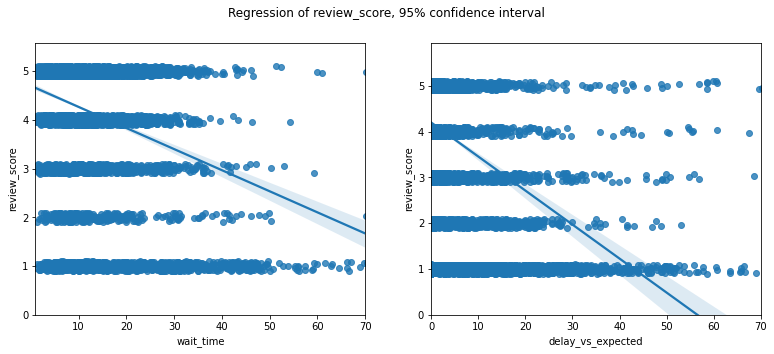

In [6]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to:
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

Goals: 
- understand how these results match those of the seaborn regplot
- Read the regression performance metric R-squared, as well as individual regression coefficients, t-values, p-values, and 95% confidence intervals

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols(formula = 'review_score~wait_time', data=orders).fit()
print(model.params)
#wait_time - if you increase wait_time by 1, you decrease the review_score by 0.05
#intercept - a review with 0 wait_time is predicted to be 4.71

Intercept    4.713829
wait_time   -0.045545
dtype: float64


In [11]:
model.rsquared
#11% of variance of review_score is explained by variance wait_time

0.11227972338420611

In [12]:
print(model.summary())
#b1 = -0.0455[-0.076 -0.073] with 95%

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.221e+04
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:56:22   Log-Likelihood:            -1.5630e+05
No. Observations:               96525   AIC:                         3.126e+05
Df Residuals:                   96523   BIC:                         3.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7138      0.006    725.216      0.0

In [13]:
model2 = smf.ols(formula = 'review_score~delay_vs_expected', data=orders).fit()
print(model2.params)
#delay_vs_expected - if you increase delay_vs_expected by 1, you decrease the review_score by 0.07
#intercept - a review_score with 0 delay_vs_expected is predicted to be 4.71

Intercept            4.199415
delay_vs_expected   -0.074271
dtype: float64


In [14]:
model2.rsquared
#7% of variance of review_score is explained by variance wait_time

0.07396537750744647

In [15]:
print(model2.summary())
#b1 = -0.0743[-0.076 -0.073] with 95%

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7710.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:            -1.5834e+05
No. Observations:               96525   AIC:                         3.167e+05
Df Residuals:                   96523   BIC:                         3.167e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1994      0.00

Comparing results with previous calculations:
- wait_time -0.05 - the average score is reduced by 0.05 for each additional day of wait
- delay - 0.1 - the average score is reduced by 0.1 for each additional day above expected

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

In [41]:
model3 = smf.ols(formula = 'review_score~wait_time + delay_vs_expected', data=orders).fit()
model3.rsquared
#11% of variance of review_score is explained by the combined variations wait_time and delay_vs_expected

0.11472466333201381

In [48]:
model3.params
#Each increase in wait_time decreases the review score by -0.04, holding delay constant.
#Controlling for delay_vs_expected number, each increase in horsepower increases the weight by 0.04

Intercept            4.644161
wait_time           -0.038820
delay_vs_expected   -0.019103
dtype: float64

In [68]:
print(model3.summary())
#Holding wait_time constant, each additional day of delay reduces the review_score on average by 
#0.0191 [0.017 - 0.21] points
#Holding delay constant, each additional day of wait_time reduces the review_score on average by 0.0388 points

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2348.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:59:25   Log-Likelihood:            -1.5446e+05
No. Observations:               96525   AIC:                         3.089e+05
Df Residuals:                   96517   BIC:                         3.090e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

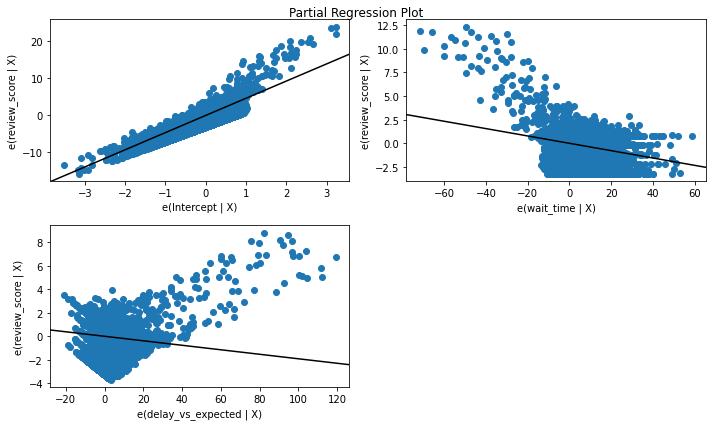

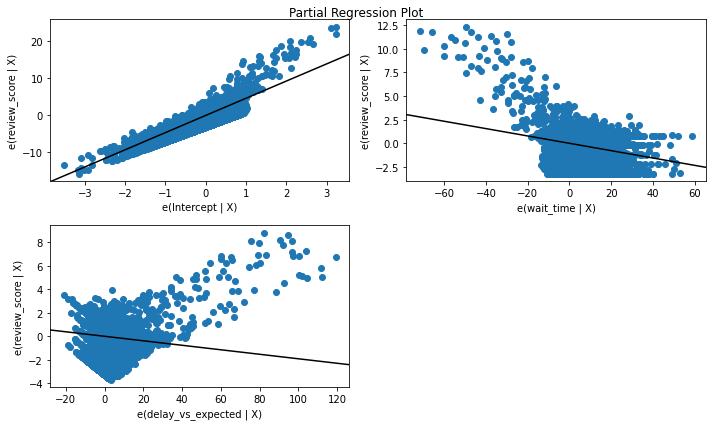

In [47]:
import statsmodels.api as sm
fig = plt.figure(figsize = (10,6))
fig = sm.graphics.plot_partregress_grid(model3, fig = fig)
fig

----
The multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **partial correlation** coefficients.

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
As R-squared is quite low: no more than 12% of the variation of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. Let's try to add more features to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset, making sure:
    - Do not create **data leaks**: do not add features that are directly derived from the `review_score`
    - Do not add two features perfectly colinear with each other
    - Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ are not of the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

In [16]:
#select features
features = [
    'wait_time',
    'delay_vs_expected',
    'number_of_products',
    'number_of_sellers',
    'price',
    'freight_value',
    'distance_seller_customer'
]

In [17]:
# standardize features (transform them into their respective z-scores)
orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,order_id,order_delivered_customer_date,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,-0.431707,15.544063,-0.162787,delivered,0,0,4,-0.264004,-0.112813,-0.511860,-0.651997,-0.979467
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,0.128587,19.137766,-0.162787,delivered,0,0,4,-0.264004,-0.112813,-0.087278,-0.000604,0.428808
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,-0.331330,26.639711,-0.162787,delivered,1,0,5,-0.264004,-0.112813,0.109912,-0.164844,-0.146045
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,0.068497,26.188819,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.440019,0.205392,2.052600
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,-1.014771,12.112049,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.560153,-0.651997,-0.959121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96528,9c5dedf39a927c1b2549525ed64a053c,2017-03-17 15:08:01,-0.454616,18.587442,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.310793,-0.449712,-0.893083
96529,63943bddc261676b46f01ca7ac2f7bd8,2018-02-28 17:37:56,1.010273,23.459051,-0.162787,delivered,0,0,4,-0.264004,-0.112813,0.181705,-0.124016,-0.213301
96530,83c1379a015df1e13d02aae0204711ab,2017-09-21 11:24:17,1.289682,30.384225,-0.162787,delivered,1,0,5,-0.264004,-0.112813,0.330507,1.960071,0.616570
96531,11c177c8e97725db2631073c19f07b62,2018-01-25 23:32:54,0.474942,37.105243,-0.162787,delivered,0,0,2,1.586072,-0.112813,1.067531,2.709822,-0.387946


In [18]:
# Create and train model4
j = ' + '
formula = 'review_score ~ ' + j.join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value + distance_seller_customer'

In [19]:
# Create and train model4
model4 = smf.ols(formula = formula, data=orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2348.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:07:22   Log-Likelihood:            -1.5446e+05
No. Observations:               96525   AIC:                         3.089e+05
Df Residuals:                   96517   BIC:                         3.090e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

---
What are the most important features?

<AxesSubplot:>

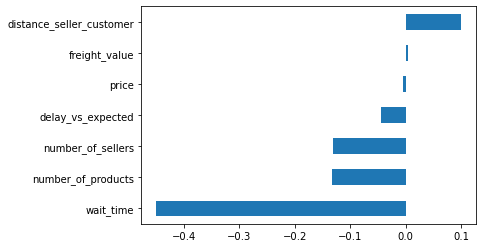

In [20]:
model4.params[1:].sort_values().plot(kind='barh')
#wait_time is the most significant feature. The higher the number of products and sellers in one order,
#the lower the review_score. Distance from the customer is also important

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score`. 
- Distance also plays a role.
- Depending on your choice of feature, I may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant




## 3 - Check model performance

Regression performance should not be measured only by it's R-squared!  
It's important to visualize the distribution of the predictions, and especially the residuals.

Compute the residuals, notice how their mean is equal to 0 (always the case in linear regression), and compute the associated RMSE.   

In [26]:
predicted_review_score = model4.predict(orders_standardized)
residuals = predicted_review_score - orders_standardized.review_score
predicted_review_score

0        4.295784
1        4.184043
2        4.332568
3        4.374034
4        4.560402
           ...   
96528    4.314726
96529    3.722048
96530    3.687776
96531    3.710528
96532    4.434960
Length: 96525, dtype: float64

In [27]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

1.1986853369569426

Text(0.5, 1.0, 'Residuals Density Plot')

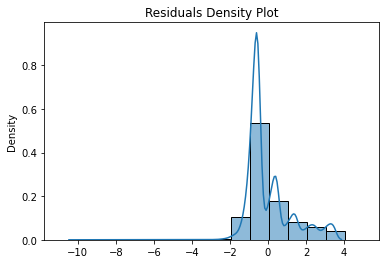

In [28]:
sns.histplot(residuals, stat='density', kde=True, discrete=True)
plt.title('Residuals Density Plot')

This model is not so great, for two reasons:
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Secondly, because we are trying to fit a "linear regression" function to a discreet classification problem

Better to try the logistic regression classifier.